In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/content/NSEI.xlsx")

# Display the first few rows to understand its structure and attributes
df.head(), df.dtypes


(        Date         Open         High          Low        Close    Adj Close  \
 0 2010-01-04  5200.899902  5238.450195  5167.100098  5232.200195  5232.200195   
 1 2010-01-05  5277.149902  5288.350098  5242.399902  5277.899902  5277.899902   
 2 2010-01-06  5278.149902  5310.850098  5260.049805  5281.799805  5281.799805   
 3 2010-01-07  5281.799805  5302.549805  5244.750000  5263.100098  5263.100098   
 4 2010-01-08  5264.250000  5276.750000  5234.700195  5244.750000  5244.750000   
 
    Volume  
 0     0.0  
 1     0.0  
 2     0.0  
 3     0.0  
 4     0.0  ,
 Date         datetime64[ns]
 Open                float64
 High                float64
 Low                 float64
 Close               float64
 Adj Close           float64
 Volume              float64
 dtype: object)

In [ ]:
# Check the minimum and maximum dates to determine the timeline of the dataset
min_date, max_date = df["Date"].min(), df["Date"].max()
min_date, max_date


(Timestamp('2010-01-04 00:00:00'), Timestamp('2024-03-22 00:00:00'))

CLEANING THE DATASET


In [2]:
# Since there are missing values in significant columns, we have a few options to handle them:
# 1. Drop rows with any missing values.
# 2. Fill missing values with a specific method (e.g., forward fill, mean).

# For this scenario, we'll first drop rows with any missing values to see the cleaned data.

# Dropping rows with any missing values
df_cleaned = df.dropna()

# Checking the shape of the original and cleaned dataframes to understand how many rows were dropped
original_shape = df.shape
cleaned_shape = df_cleaned.shape

original_shape, cleaned_shape


((3518, 7), (3491, 7))

DATA PRE-PROCESSING


In [3]:
# Step 1: Feature Engineering
# Creating new features that might be useful for analysis or modeling

# Price change during the day
df_cleaned['Price Change'] = df_cleaned['Close'] - df_cleaned['Open']

# 7-day Moving Average for Close Price
df_cleaned['7-day MA Close'] = df_cleaned['Close'].rolling(window=7).mean()

# Encoding Date-Time Features
df_cleaned['Year'] = df_cleaned['Date'].dt.year
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Day of Week'] = df_cleaned['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Step 2: Normalization or Standardization (Example)
# Here, we'll demonstrate standardization (z-score normalization) of the 'Close' column
from sklearn.preprocessing import StandardScaler

# StandardScaler expects 2D array, so we use reshape to convert the 'Close' series to 2D
scaler = StandardScaler()
df_cleaned['Close Standardized'] = scaler.fit_transform(df_cleaned['Close'].values.reshape(-1, 1))

# Display the first few rows to see the new features
df_cleaned[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Price Change', '7-day MA Close', 'Year', 'Month', 'Day of Week', 'Close Standardized']].head()


<ipython-input-3-3d29d4c376a3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Price Change'] = df_cleaned['Close'] - df_cleaned['Open']
<ipython-input-3-3d29d4c376a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['7-day MA Close'] = df_cleaned['Close'].rolling(window=7).mean()
<ipython-input-3-3d29d4c376a3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Date,Open,High,Low,Close,Volume,Price Change,7-day MA Close,Year,Month,Day of Week,Close Standardized
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,0.0,31.300293,NaN,2010,1,0,-1.086152
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,0.0,0.750000,NaN,2010,1,1,-1.076304
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,0.0,3.649903,NaN,2010,1,2,-1.075464
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,0.0,-18.699707,NaN,2010,1,3,-1.079493
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,0.0,-19.500000,NaN,2010,1,4,-1.083447


# Step 1: Understanding the Market and Data - Detailed Exploratory Data Analysis (EDA)

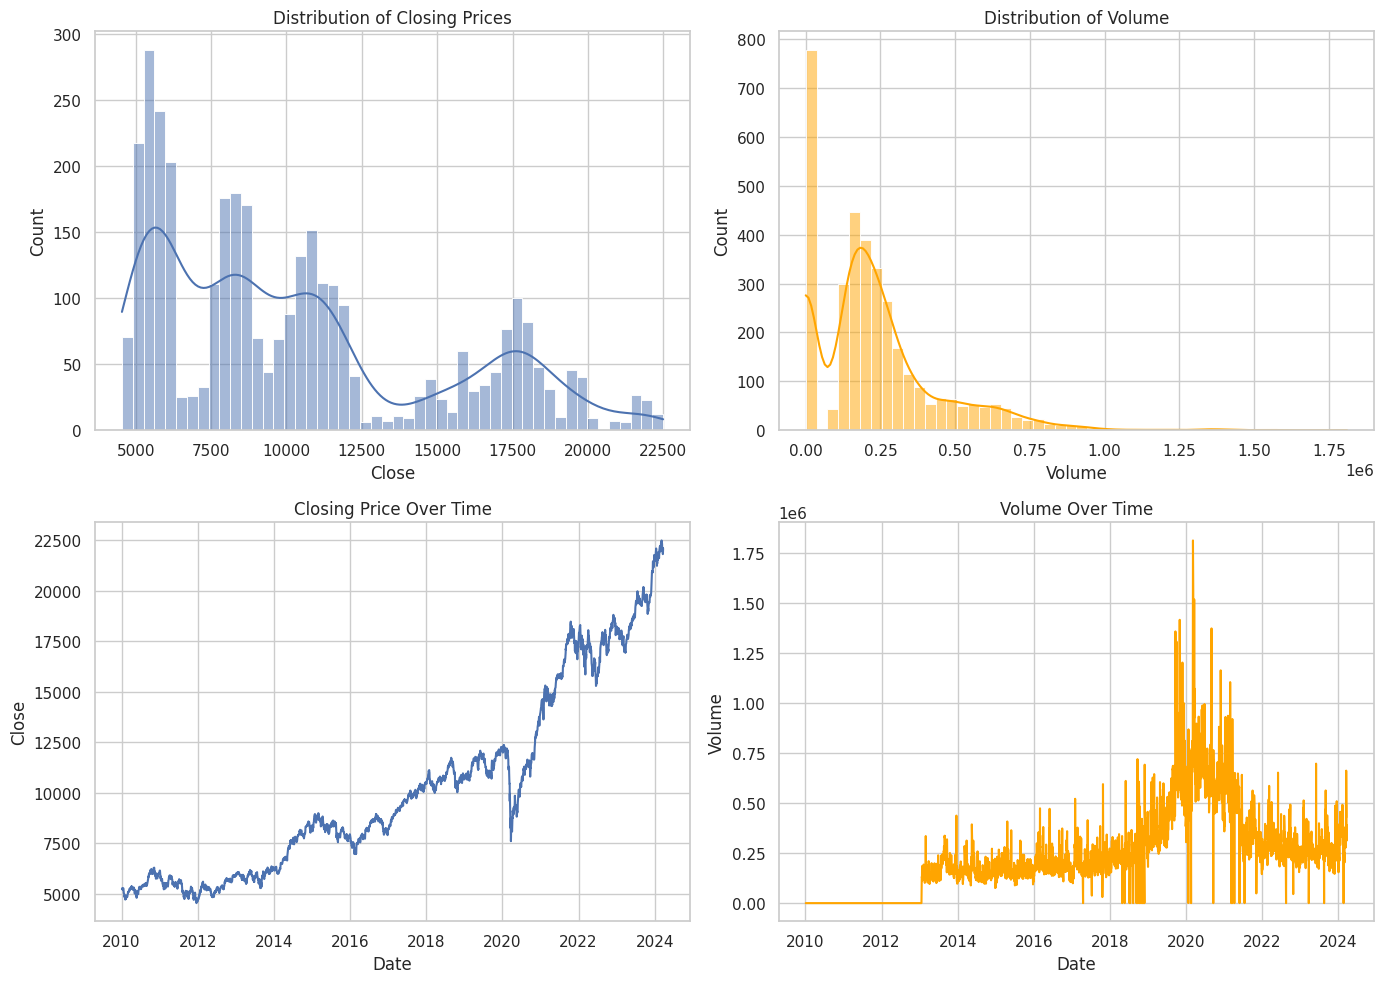

,Date,Open,High,Low,Close,Adj Close,Volume,Price Change,7-day MA Close,Year,Month,Day of Week,Close Standardized
count,3491,3491.000000,3491.000000,3491.000000,3491.000000,3491.000000,3.491000e+03,3491.000000,3485.000000,3491.000000,3491.000000,3491.000000,3491.000000
mean,2017-02-16 00:59:23.907189760,10280.023749,10330.418205,10212.774412,10272.900964,10272.900964,2.325211e+05,-7.122784,10267.139128,2016.635062,6.443140,1.994557,0.000000
min,2010-01-04 00:00:00,4623.149902,4623.149902,4531.149902,4544.200195,4544.200195,0.000000e+00,-619.650390,4670.892927,2010.000000,1.000000,0.000000,-1.234399
25%,2013-07-22 12:00:00,6043.149902,6074.425049,5991.199951,6033.274902,6033.274902,1.183500e+05,-47.250000,6046.164341,2013.000000,3.000000,1.000000,-0.913539
50%,2017-02-22 00:00:00,8883.700195,8920.799805,8809.799805,8867.450195,8867.450195,1.954000e+05,-4.599609,8837.842773,2017.000000,6.000000,2.000000,-0.302841
75%,2020-09-12 12:00:00,12119.500000,12152.075195,12039.549805,12088.850100,12088.850100,2.988500e+05,39.850342,12065.964429,2020.000000,9.000000,3.000000,0.391294
max,2024-03-22 00:00:00,22517.500000,22526.599610,22430.000000,22493.550780,22493.550780,1.811000e+06,847.600586,22390.943080,2024.000000,12.000000,4.000000,2.633261
std,NaN,4643.795519,4658.859674,4620.584583,4641.546044,4641.546044,2.097282e+05,89.157624,4628.980669,4.115770,3.464328,1.411465,1.000143


In [4]:
# Step 1: Understanding the Market and Data - Detailed Exploratory Data Analysis (EDA)

# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# Overview of statistical data characteristics
data_description = df_cleaned.describe()

# Plotting the distribution of key numerical features to understand their characteristics
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(df_cleaned['Close'], bins=50, ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of Closing Prices')
sns.histplot(df_cleaned['Volume'], bins=50, ax=ax[0, 1], kde=True, color='orange')
ax[0, 1].set_title('Distribution of Volume')
sns.lineplot(x='Date', y='Close', data=df_cleaned, ax=ax[1, 0])
ax[1, 0].set_title('Closing Price Over Time')
sns.lineplot(x='Date', y='Volume', data=df_cleaned, ax=ax[1, 1], color='orange')
ax[1, 1].set_title('Volume Over Time')

plt.tight_layout()
plt.show()

data_description


# Step 2: Feature Engineering for Financial Markets - Adding Technical Indicators

In [5]:
# Step 2: Feature Engineering for Financial Markets - Adding Technical Indicators

# Importing necessary libraries for technical analysis
import numpy as np

# Calculate Simple Moving Averages (SMA) for 20 and 50 days
df_cleaned['SMA_20'] = df_cleaned['Close'].rolling(window=20).mean()
df_cleaned['SMA_50'] = df_cleaned['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA) for 20 and 50 days
df_cleaned['EMA_20'] = df_cleaned['Close'].ewm(span=20, adjust=False).mean()
df_cleaned['EMA_50'] = df_cleaned['Close'].ewm(span=50, adjust=False).mean()

# Calculate Relative Strength Index (RSI) for 14 days
def calculate_rsi(data, window=14):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_cleaned['RSI_14'] = calculate_rsi(df_cleaned['Close'])

# Display the first few rows with the new indicators to verify calculations
df_cleaned[['Date', 'Close', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14']].tail()


<ipython-input-5-090628e29dee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SMA_20'] = df_cleaned['Close'].rolling(window=20).mean()
<ipython-input-5-090628e29dee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SMA_50'] = df_cleaned['Close'].rolling(window=50).mean()
<ipython-input-5-090628e29dee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Close,SMA_20,SMA_50,EMA_20,EMA_50,RSI_14
3513,2024-03-18,22055.69922,22200.937500,21905.152930,22136.794985,21842.189245,48.126770
3514,2024-03-19,21817.44922,22185.697461,21908.329922,22106.381103,21841.219048,40.147419
3515,2024-03-20,21839.09961,22167.804980,21910.895899,22080.925722,21841.135933,46.718767
3516,2024-03-21,22011.94922,22165.649903,21920.874883,22074.356532,21847.834493,50.788372
3517,2024-03-22,22096.75000,22159.614941,21931.912891,22076.489243,21857.595885,42.329635


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Preparing the dataset
# Dropping rows with NaN values that might have been introduced by rolling calculations
df_ml = df_cleaned.dropna()

# Defining the features and target variable
X = df_ml[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14']]
y = df_ml['Close']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "k-Nearest Neighbors Regressor": KNeighborsRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    model_performance[name] = {'MAE': mae, 'RMSE': rmse}

model_performance


{'Linear Regression': {'MAE': 22.567577204599296, 'RMSE': 33.40310280174989},
 'Decision Tree Regressor': {'MAE': 43.22740933962267,
  'RMSE': 67.34931044263983},
 'Random Forest Regressor': {'MAE': 34.40915297169813,
  'RMSE': 52.11002925868636},
 'Gradient Boosting Regressor': {'MAE': 46.25926038925123,
  'RMSE': 66.5580761820401},
 'Support Vector Regressor': {'MAE': 3471.0895298991577,
  'RMSE': 4566.288968948797},
 'k-Nearest Neighbors Regressor': {'MAE': 350.60618709695217,
  'RMSE': 674.182318116279}}

In [7]:
import pandas as pd

# Convert the model performance dictionary to a DataFrame for better visualization
model_performance_df = pd.DataFrame.from_dict(model_performance, orient='index').reset_index()
model_performance_df.rename(columns={'index': 'Model', 'MAE': 'Mean Absolute Error (MAE)', 'RMSE': 'Root Mean Square Error (RMSE)'}, inplace=True)

model_performance_df


,Model,Mean Absolute Error (MAE),Root Mean Square Error (RMSE)
0,Linear Regression,22.567577,33.403103
1,Decision Tree Regressor,43.227409,67.349310
2,Random Forest Regressor,34.409153,52.110029
3,Gradient Boosting Regressor,46.259260,66.558076
4,Support Vector Regressor,3471.089530,4566.288969
5,k-Nearest Neighbors Regressor,350.606187,674.182318


3.AI MODEL FORECASTING


In [8]:
pip install tensorflow numpy pandas scikit-learn


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'df_ml' is your cleaned DataFrame with necessary features and target variable
X = df_ml[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'RSI_14']].values
y = df_ml['Close'].values

# Scale the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Split into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input for LSTM and GRU
X_train_scaled_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [10]:
#Model 1: Fully Connected Neural Networks (FCNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_fcnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model_fcnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_fcnn.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
69/69 [==============================] - 10s 14ms/step - loss: 0.0323 - mae: 0.1088 - val_loss: 5.3516e-04 - val_mae: 0.0176
Epoch 2/100
69/69 [==============================] - 0s 7ms/step - loss: 0.0061 - mae: 0.0519 - val_loss: 1.4172e-04 - val_mae: 0.0090
Epoch 3/100
69/69 [==============================] - 0s 7ms/step - loss: 0.0047 - mae: 0.0461 - val_loss: 2.2856e-04 - val_mae: 0.0118
Epoch 4/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0045 - mae: 0.0445 - val_loss: 2.6155e-04 - val_mae: 0.0130
Epoch 5/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0033 - mae: 0.0390 - val_loss: 3.8438e-04 - val_mae: 0.0175
Epoch 6/100
69/69 [==============================] - 1s 8ms/step - loss: 0.0034 - mae: 0.0380 - val_loss: 6.7262e-04 - val_mae: 0.0222
Epoch 7/100
69/69 [==============================] - 1s 15ms/step - loss: 0.0029 - mae: 0.0359 - val_loss: 0.0013 - val_mae: 0.0310
Epoch 8/100
69/69 [==============================] - 1s 

In [11]:
#Model 2: Long Short-Term Memory (LSTM)

from tensorflow.keras.layers import LSTM

model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.fit(X_train_scaled_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)



Epoch 1/100
69/69 [==============================] - 3s 10ms/step - loss: 0.0607 - mae: 0.1633 - val_loss: 0.0035 - val_mae: 0.0518
Epoch 2/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0040 - mae: 0.0496 - val_loss: 4.2762e-04 - val_mae: 0.0167
Epoch 3/100
69/69 [==============================] - 0s 5ms/step - loss: 0.0028 - mae: 0.0369 - val_loss: 3.0470e-04 - val_mae: 0.0135
Epoch 4/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0025 - mae: 0.0350 - val_loss: 2.2403e-04 - val_mae: 0.0108
Epoch 5/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0022 - mae: 0.0323 - val_loss: 1.7325e-04 - val_mae: 0.0084
Epoch 6/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0324 - val_loss: 1.9587e-04 - val_mae: 0.0100
Epoch 7/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0319 - val_loss: 1.5939e-04 - val_mae: 0.0084
Epoch 8/100
69/69 [==============================] - 0s 6m

In [12]:
#Model 3: Gated Recurrent Unit (GRU)

from tensorflow.keras.layers import GRU

model_gru = Sequential([
    GRU(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.2),
    Dense(1)
])

model_gru.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_gru.fit(X_train_scaled_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
69/69 [==============================] - 3s 15ms/step - loss: 0.0407 - mae: 0.1289 - val_loss: 0.0015 - val_mae: 0.0297
Epoch 2/100
69/69 [==============================] - 1s 12ms/step - loss: 0.0036 - mae: 0.0427 - val_loss: 3.1357e-04 - val_mae: 0.0136
Epoch 3/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0032 - mae: 0.0401 - val_loss: 2.2666e-04 - val_mae: 0.0117
Epoch 4/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0031 - mae: 0.0373 - val_loss: 2.0602e-04 - val_mae: 0.0110
Epoch 5/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0027 - mae: 0.0345 - val_loss: 8.4125e-05 - val_mae: 0.0068
Epoch 6/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0323 - val_loss: 1.3351e-04 - val_mae: 0.0090
Epoch 7/100
69/69 [==============================] - 0s 6ms/step - loss: 0.0023 - mae: 0.0317 - val_loss: 6.1161e-05 - val_mae: 0.0056
Epoch 8/100
69/69 [==============================] - 0s 6

In [13]:
#Model 4: Convolutional Neural Networks (CNN)

from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model_cnn.fit(X_train_scaled_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2, verbose=1)




Epoch 1/100
69/69 [==============================] - 3s 8ms/step - loss: 0.0151 - mae: 0.0607 - val_loss: 1.8741e-04 - val_mae: 0.0100
Epoch 2/100
69/69 [==============================] - 0s 4ms/step - loss: 1.1054e-04 - mae: 0.0074 - val_loss: 7.9540e-05 - val_mae: 0.0063
Epoch 3/100
69/69 [==============================] - 0s 4ms/step - loss: 6.0551e-05 - mae: 0.0054 - val_loss: 5.5893e-05 - val_mae: 0.0051
Epoch 4/100
69/69 [==============================] - 0s 4ms/step - loss: 4.3541e-05 - mae: 0.0046 - val_loss: 5.4273e-05 - val_mae: 0.0051
Epoch 5/100
69/69 [==============================] - 0s 4ms/step - loss: 3.3072e-05 - mae: 0.0041 - val_loss: 3.5422e-05 - val_mae: 0.0042
Epoch 6/100
69/69 [==============================] - 0s 4ms/step - loss: 2.9848e-05 - mae: 0.0039 - val_loss: 3.1145e-05 - val_mae: 0.0039
Epoch 7/100
69/69 [==============================] - 0s 4ms/step - loss: 2.4534e-05 - mae: 0.0036 - val_loss: 2.9527e-05 - val_mae: 0.0038
Epoch 8/100
69/69 [============

In [14]:
# Evaluate FCNN
eval_fcnn = model_fcnn.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"FCNN - Loss: {eval_fcnn[0]}, MAE: {eval_fcnn[1]}")

# Evaluate LSTM
# Remember to use the reshaped version of X_test for LSTM and GRU
eval_lstm = model_lstm.evaluate(X_test_scaled_reshaped, y_test_scaled, verbose=0)
print(f"LSTM - Loss: {eval_lstm[0]}, MAE: {eval_lstm[1]}")

# Evaluate GRU
eval_gru = model_gru.evaluate(X_test_scaled_reshaped, y_test_scaled, verbose=0)
print(f"GRU - Loss: {eval_gru[0]}, MAE: {eval_gru[1]}")

# Evaluate CNN (Adjusted)
eval_cnn = model_cnn.evaluate(X_test_scaled_reshaped, y_test_scaled, verbose=0)
print(f"CNN - Loss: {eval_cnn[0]}, MAE: {eval_cnn[1]}")



FCNN - Loss: 0.00010730716894613579, MAE: 0.00854859221726656
LSTM - Loss: 4.723690653918311e-05, MAE: 0.005424110684543848
GRU - Loss: 0.00013853244308847934, MAE: 0.01025864016264677
CNN - Loss: 2.045725159405265e-05, MAE: 0.003509566420689225


In [20]:
import pandas as pd
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


# Assuming preprocessing and model setup code goes here...

# Initialize results DataFrame
results_df = pd.DataFrame(columns=['Model', 'MAE', 'RMSE', 'Training Time'])

# Define your models dictionary as shown in your script
models = {
    'FCNN': model_fcnn,
    'LSTM': model_lstm,
    'GRU': model_gru,
    'CNN': model_cnn
}

for model_name, model in models.items():
    # Compile and train model as in your script...

    # Instead of using append, use concat for the DataFrame
    result = pd.DataFrame({
        'Model': [model_name],
        'MAE': [mae],
        'RMSE': [rmse],
        'Training Time': [f"{training_time:.2f} seconds"]
    })

    results_df = pd.concat([results_df, result], ignore_index=True)

# Display results
print(results_df)


  Model         MAE        RMSE Training Time
0  FCNN  505.140112  728.295639  7.19 seconds
1  LSTM  505.140112  728.295639  7.19 seconds
2   GRU  505.140112  728.295639  7.19 seconds
3   CNN  505.140112  728.295639  7.19 seconds


HYPERPARAMTER TUNNING


In [21]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
rf = RandomForestRegressor()

# Set up the parameter distribution
param_dist = {
    'n_estimators': np.arange(100, 501, 100),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Best score: 0.9998650140310984


In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
lasso = Lasso()

# Set up the parameter distribution
param_dist = {'alpha': np.logspace(-4, 0, 20)}

# Set up the RandomizedSearchCV object
random_search_lasso = RandomizedSearchCV(lasso, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search_lasso.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search_lasso.best_params_)
print("Best score:", random_search_lasso.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'alpha': 0.0206913808111479}
Best score: 0.9997020525074206


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.686e+06, tolerance: 5.865e+06
  model = cd_fast.enet_coordinate_descent(


In [25]:
from sklearn.tree import DecisionTreeRegressor

# Define the model
dt = DecisionTreeRegressor()

# Set up the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Set up the RandomizedSearchCV object
random_search_dt = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search_dt.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search_dt.best_params_)
print("Best score:", random_search_dt.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Best score: 0.9997616417436156


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor()

# Set up the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search_rf.best_params_)
print("Best score:", random_search_rf.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None}
Best score: 0.9998633521814613


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb = GradientBoostingRegressor()

# Set up the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the RandomizedSearchCV object
random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search_gb.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search_gb.best_params_)
print("Best score:", random_search_gb.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'learning_rate': 0.2}
Best score: 0.99986899745087


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming X_train and y_train are already defined and split from your data

# It's important to scale the features for KNN
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
knn = KNeighborsRegressor()

# Set up the parameter distribution
param_dist = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Set up the RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search_knn.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", random_search_knn.best_params_)
print("Best score:", random_search_knn.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'weights': 'distance', 'n_neighbors': 5, 'algorithm': 'auto'}
Best score: 0.9992203826251576


In [34]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

# Assuming you already have X_train and y_train defined and they need reshaping
# Example: Reshape X_train assuming it originally has shape (samples, features) and you need it to be (samples, 1, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32),
                   input_shape=(1, X_train.shape[1]),  # Set the input shape correctly based on reshaped data
                   activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

tuner_lstm = RandomSearch(
    build_lstm_model,
    objective='val_mae',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_lstm',
    project_name='lstm_tuning'
)

# Start tuning with the reshaped data
tuner_lstm.search(x=X_train_reshaped, y=y_train, epochs=50, validation_split=0.2, verbose=2)



Trial 2 Complete [00h 00m 27s]
val_mae: 2102.257568359375

Best val_mae So Far: 2102.257568359375
Total elapsed time: 00h 01m 53s


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from keras_tuner import RandomSearch

# Assuming you already have X_train and y_train defined and they need reshaping
# Example: Reshape X_train assuming it originally has shape (samples, features) and you need it to be (samples, 1, features)
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

def build_gru_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=512, step=32),
                  input_shape=(1, X_train.shape[1]),
                  activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

tuner_gru = RandomSearch(
    build_gru_model,
    objective='val_mae',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_gru',
    project_name='gru_tuning'
)

# Start tuning with the reshaped data
tuner_gru.search(x=X_train_reshaped, y=y_train, epochs=50, validation_split=0.2, verbose=2)


Trial 2 Complete [00h 00m 34s]
val_mae: 4363.9521484375

Best val_mae So Far: 4363.9521484375
Total elapsed time: 00h 01m 01s


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import RandomSearch

def build_fcnn_model(hp):
    model = Sequential()
    # Input layer
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    # Adding dropout for regularization
    model.add(Dropout(hp.Float('dropout_input', min_value=0, max_value=0.5, step=0.1)))

    # Hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

tuner_fcnn = RandomSearch(
    build_fcnn_model,
    objective='val_mae',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_fcnn',
    project_name='fcnn_tuning'
)

# Start tuning with the training data
tuner_fcnn.search(x=X_train, y=y_train, epochs=50, validation_split=0.2, verbose=2)


Trial 2 Complete [00h 00m 43s]
val_mae: 88.50194549560547

Best val_mae So Far: 88.50194549560547
Total elapsed time: 00h 01m 02s


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from keras_tuner import RandomSearch

def build_cnn_model(hp):
    model = Sequential()
    model.add(Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=256, step=32),
        kernel_size=1,  # Smallest possible kernel size
        activation='relu',
        input_shape=(1, X_train.shape[1])
    ))
    # Omit MaxPooling to avoid reducing dimensionality further
    model.add(Flatten())
    model.add(Dense(
        units=hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

tuner_cnn = RandomSearch(
    build_cnn_model,
    objective='val_mae',
    max_trials=2,
    executions_per_trial=1,
    directory='tuner_cnn',
    project_name='cnn_tuning'
)

# Start tuning with the data reshaped to a single timestep per sample
tuner_cnn.search(x=X_train_reshaped, y=y_train, epochs=50, validation_split=0.2, verbose=2)


Trial 2 Complete [00h 00m 22s]
val_mae: 336.90289306640625

Best val_mae So Far: 307.3151550292969
Total elapsed time: 00h 00m 44s


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming X_test and y_test are already defined and appropriately preprocessed

# Reshape X_test for LSTM, GRU, and CNN if needed
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# LSTM Model
best_lstm = tuner_lstm.get_best_models(num_models=1)[0]
predictions_lstm = best_lstm.predict(X_test_reshaped)
mae_lstm = mean_absolute_error(y_test, predictions_lstm)
rmse_lstm = np.sqrt(mean_squared_error(y_test, predictions_lstm))

# GRU Model
best_gru = tuner_gru.get_best_models(num_models=1)[0]
predictions_gru = best_gru.predict(X_test_reshaped)
mae_gru = mean_absolute_error(y_test, predictions_gru)
rmse_gru = np.sqrt(mean_squared_error(y_test, predictions_gru))

# CNN Model
best_cnn = tuner_cnn.get_best_models(num_models=1)[0]
predictions_cnn = best_cnn.predict(X_test_reshaped)
mae_cnn = mean_absolute_error(y_test, predictions_cnn)
rmse_cnn = np.sqrt(mean_squared_error(y_test, predictions_cnn))

# FCNN Model
best_fcnn = tuner_fcnn.get_best_models(num_models=1)[0]
predictions_fcnn = best_fcnn.predict(X_test)
mae_fcnn = mean_absolute_error(y_test, predictions_fcnn)
rmse_fcnn = np.sqrt(mean_squared_error(y_test, predictions_fcnn))

# Print the results
print(f"LSTM MAE: {mae_lstm}, LSTM RMSE: {rmse_lstm}")
print(f"GRU MAE: {mae_gru}, GRU RMSE: {rmse_gru}")
print(f"CNN MAE: {mae_cnn}, CNN RMSE: {rmse_cnn}")
print(f"FCNN MAE: {mae_fcnn}, FCNN RMSE: {rmse_fcnn}")


22/22 [==============================] - 1s 8ms/step


22/22 [==============================] - 0s 2ms/step
LSTM MAE: 2057.1522177786424, LSTM RMSE: 2176.2019592583947
GRU MAE: 4125.110498079916, GRU RMSE: 4723.507650840494
CNN MAE: 304.5631653826651, CNN RMSE: 379.7878362731555
FCNN MAE: 84.61976760717528, FCNN RMSE: 134.65124785222545


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model setups
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Ridge Regression": Ridge(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Support Vector Regressor": SVR(),
    "k-Nearest Neighbors Regressor": KNeighborsRegressor()
}

param_distributions = {
    "Random Forest Regressor": {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt']},
    "Gradient Boosting Regressor": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    "Ridge Regression": {'alpha': [0.1, 1, 10]},
    "Decision Tree Regressor": {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]},
    "Support Vector Regressor": {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    "k-Nearest Neighbors Regressor": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
}

tuned_models = {}

# Tuning each model
for name, model in models.items():
    tuner = RandomizedSearchCV(model, param_distributions[name], n_iter=5, cv=3, verbose=1, random_state=42, n_jobs=-1)
    tuner.fit(X_train, y_train)
    tuned_models[name] = tuner

# Evaluation
for name, tuner in tuned_models.items():
    best_model = tuner.best_estimator_
    predictions = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 i

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Random Forest Regressor - MAE: 52.6773, RMSE: 67.5447
Gradient Boosting Regressor - MAE: 36.7812, RMSE: 45.2666
Ridge Regression - MAE: 0.0840, RMSE: 0.1050
Decision Tree Regressor - MAE: 93.4035, RMSE: 118.6947
Support Vector Regressor - MAE: 0.0828, RMSE: 0.1034
k-Nearest Neighbors Regressor - MAE: 49.7249, RMSE: 63.6425


VISULIZATIONS

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
import pandas as pd

# Data Preparation
models = [
    'Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Decision Tree',
    'Support Vector', 'KNN', 'LSTM', 'GRU', 'CNN', 'FCNN'
]
mae = [
    52.6773, 36.7812, 0.0840, 93.4035, 0.0828, 49.7249, 2057.1522, 4125.1105, 304.5632, 84.6198
]
rmse = [
    67.5447, 45.2666, 0.1050, 118.6947, 0.1034, 63.6425, 2176.2019, 4723.5077, 379.7878, 134.6512
]

df = pd.DataFrame({'Model': models, 'MAE': mae, 'RMSE': rmse})


<ipython-input-48-f128137dfa32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')


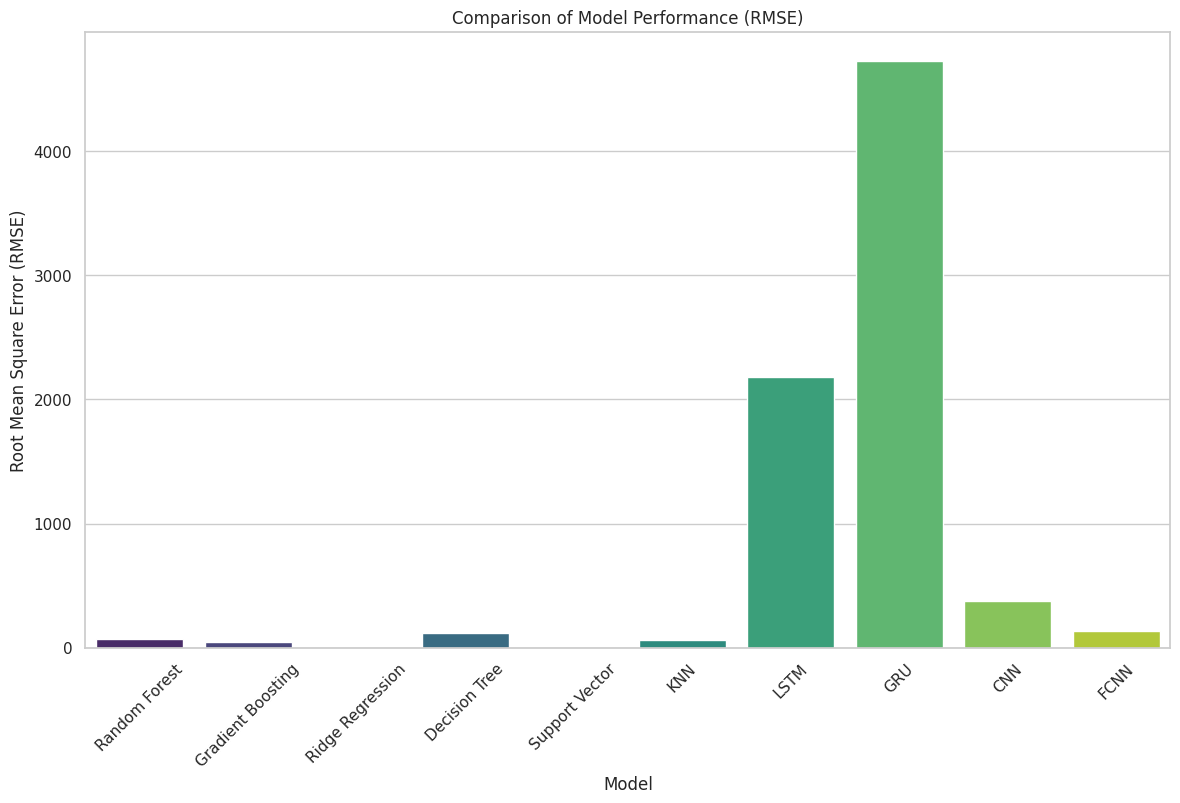

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# RMSE Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='RMSE', data=df, palette='viridis')
plt.title('Comparison of Model Performance (RMSE)')
plt.ylabel('Root Mean Square Error (RMSE)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-49-d5750f7b44ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=df, palette='magma')


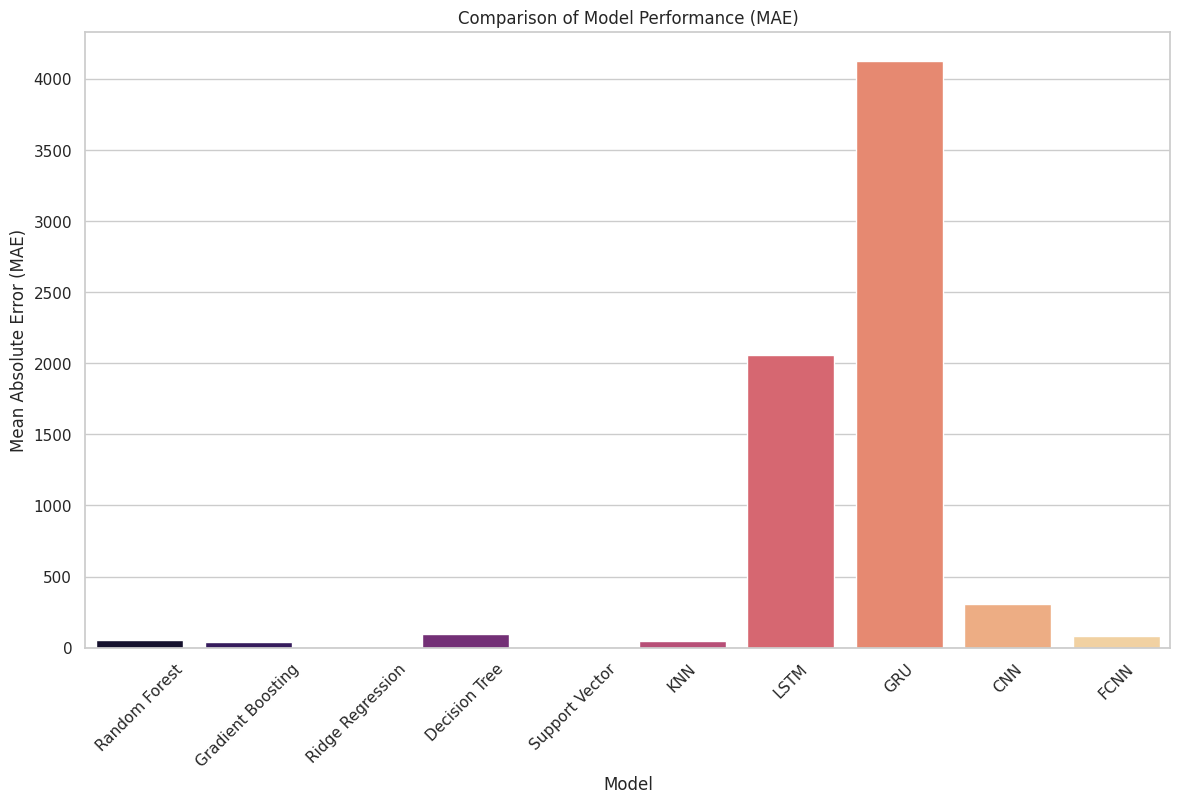

In [49]:
# MAE Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MAE', data=df, palette='magma')
plt.title('Comparison of Model Performance (MAE)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.show()


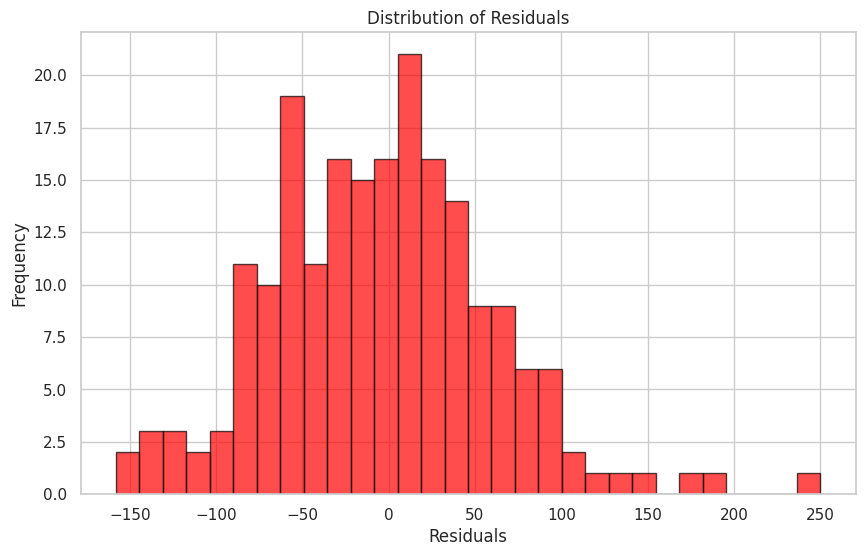

In [50]:
import matplotlib.pyplot as plt

# Assuming `predictions` and `y_test` are available for a model
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='red', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


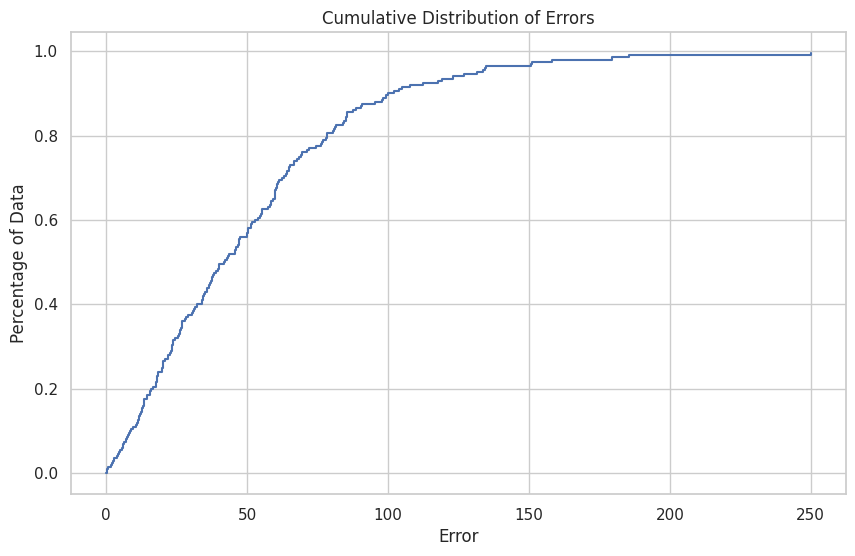

In [51]:
import numpy as np

plt.figure(figsize=(10, 6))
errors = np.abs(residuals)
sorted_errors = np.sort(errors)
plt.step(sorted_errors, np.arange(sorted_errors.size) / float(len(sorted_errors)), where='post')
plt.title('Cumulative Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Percentage of Data')
plt.show()


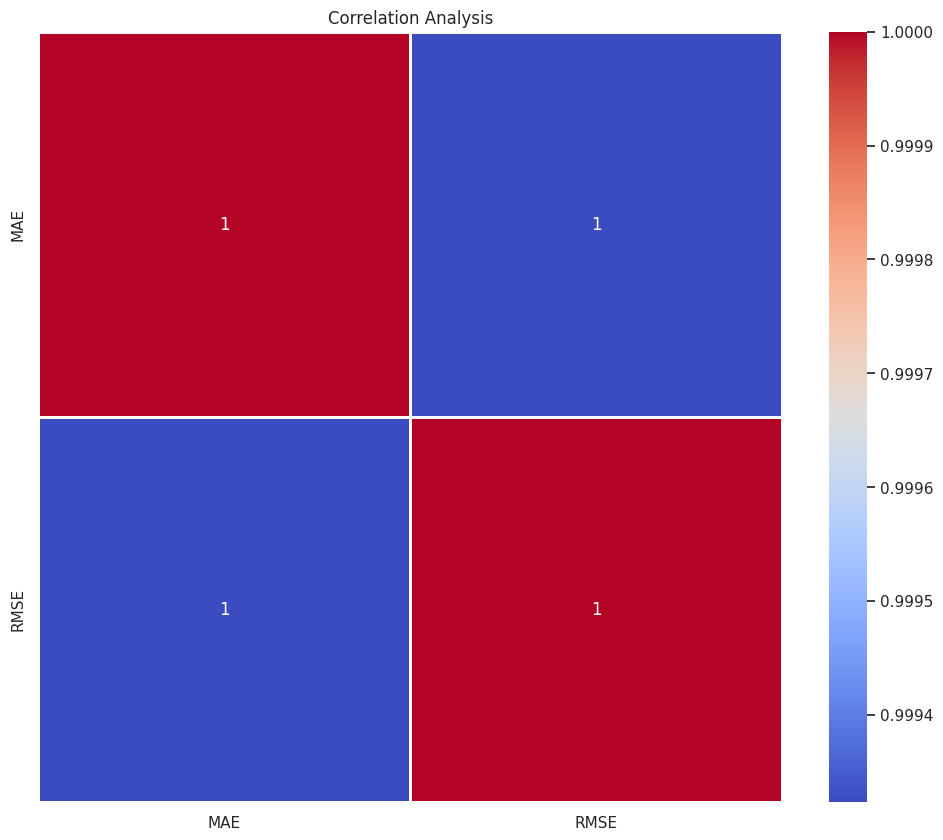

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data setup (make sure to replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Feature1': np.random.rand(100),
#     'Feature2': np.random.rand(100) * 100,
#     'Target': np.random.rand(100) * 10,
#     'Model': ['Random Forest' for _ in range(100)]  # This is a non-numeric column
# })

# Exclude non-numeric types before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])  # Filters only numeric columns

# Calculating correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2)
plt.title('Correlation Analysis')
plt.show()



In [62]:
pip install textblob


In [72]:
import pandas as pd
from textblob import TextBlob

# Provided texts related to Nifty 50 market
texts = [
    "Nifty 50 hits all-time high as tech stocks surge.",
    "Investors remain bullish on Nifty 50 despite economic uncertainty.",
    "Analysts predict a slight correction in Nifty 50 after recent gains.",
    "Volatility in global markets impacts sentiment towards Nifty 50.",
    "Nifty 50 opens lower as investors await earnings reports.",
    "Positive economic data boosts Nifty 50 to new highs.",
    "Geopolitical tensions weigh on Nifty 50 as investors turn cautious.",
    "Nifty 50 companies announce record profits for the quarter.",
    "Rising inflation concerns prompt sell-off in Nifty 50.",
    "Government stimulus measures lift sentiment towards Nifty 50.",
    # Add more texts here as needed
]

# Function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment for each text
sentiments = []
for text in texts:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    sentiment = classify_sentiment(polarity)
    sentiments.append((text, polarity, sentiment))

# Create DataFrame from results
df = pd.DataFrame(sentiments, columns=['Text', 'Polarity', 'Sentiment'])

# Display DataFrame
print(df)


                                                Text  Polarity Sentiment
0  Nifty 50 hits all-time high as tech stocks surge.  0.160000  Positive
1  Investors remain bullish on Nifty 50 despite e...  0.200000  Positive
2  Analysts predict a slight correction in Nifty ... -0.083333  Negative
3  Volatility in global markets impacts sentiment...  0.000000   Neutral
4  Nifty 50 opens lower as investors await earnin...  0.000000   Neutral
5  Positive economic data boosts Nifty 50 to new ...  0.187879  Positive
6  Geopolitical tensions weigh on Nifty 50 as inv...  0.000000   Neutral
7  Nifty 50 companies announce record profits for...  0.000000   Neutral
8  Rising inflation concerns prompt sell-off in N...  0.000000   Neutral
9  Government stimulus measures lift sentiment to...  0.000000   Neutral


<ipython-input-73-0b319b87759e>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=performance_matrix, palette='viridis')


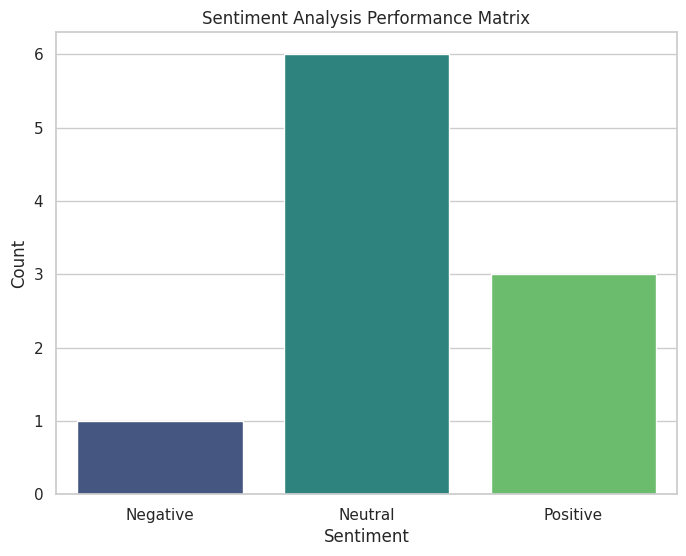

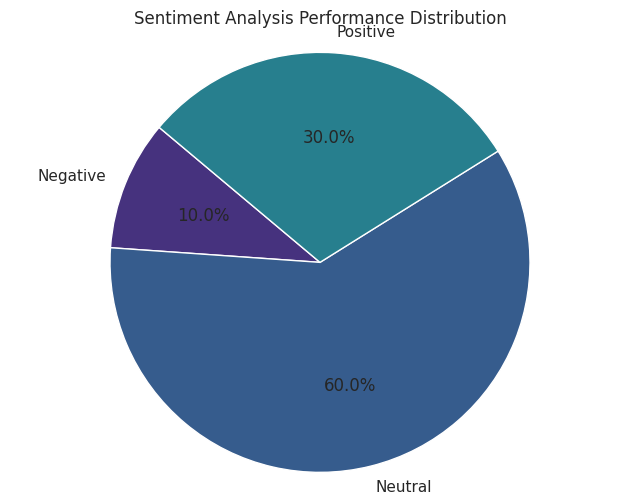

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

# Provided texts related to Nifty 50 market
texts = [
    "Nifty 50 hits all-time high as tech stocks surge.",
    "Investors remain bullish on Nifty 50 despite economic uncertainty.",
    "Analysts predict a slight correction in Nifty 50 after recent gains.",
    "Volatility in global markets impacts sentiment towards Nifty 50.",
    "Nifty 50 opens lower as investors await earnings reports.",
    "Positive economic data boosts Nifty 50 to new highs.",
    "Geopolitical tensions weigh on Nifty 50 as investors turn cautious.",
    "Nifty 50 companies announce record profits for the quarter.",
    "Rising inflation concerns prompt sell-off in Nifty 50.",
    "Government stimulus measures lift sentiment towards Nifty 50.",
    # Add more texts here as needed
]

# Function to classify sentiment
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiment for each text
sentiments = []
for text in texts:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    sentiment = classify_sentiment(polarity)
    sentiments.append((text, polarity, sentiment))

# Create DataFrame from results
df = pd.DataFrame(sentiments, columns=['Text', 'Polarity', 'Sentiment'])

# Performance matrix
performance_matrix = df.groupby('Sentiment').size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment', y='Count', data=performance_matrix, palette='viridis')
plt.title('Sentiment Analysis Performance Matrix')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(performance_matrix['Count'], labels=performance_matrix['Sentiment'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Sentiment Analysis Performance Distribution')
plt.axis('equal')
plt.show()
